# Problem Statement 

Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").


Dataset:

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone
 

Objective:
- To implement the techniques learned as a part of the course.


Learning Outcomes:
- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model




# Load required Libraries 

In [106]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from wordcloud import WordCloud
from termcolor import cprint
import warnings   

#remove html tags
from bs4 import BeautifulSoup          # Beautiful soup is a parsing library that can use different parsers.
#remove accented characters
import unicodedata

#tokenization
import nltk                                     # Natural language processing tool-kit
from nltk.tokenize.toktok import ToktokTokenizer

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re

#lemmatization
from nltk.stem import WordNetLemmatizer

#uncomment the below two lines to install spacy and download the language model
# !pip install spacy
# !python -m spacy download en_core_web_sm

import spacy


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # Handling Imbalanced

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Basic Data Analysis : count, shape , duplicates etc. 

### Read the dataset

In [2]:
tweets = pd.read_csv("/content/Tweets.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
data = tweets.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


### Understand the shape of the dataset.

In [6]:
data.shape

(14640, 15)

### Check for duplicates and remove if necessary 

In [7]:
data[data.duplicated()].count()

tweet_id                        36
airline_sentiment               36
airline_sentiment_confidence    36
negativereason                  19
negativereason_confidence       19
airline                         36
airline_sentiment_gold           0
name                            36
negativereason_gold              0
retweet_count                   36
text                            36
tweet_coord                      4
tweet_created                   36
tweet_location                  26
user_timezone                   30
dtype: int64

### Check the data types of the columns for the dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [10]:
data.isnull().values.any() 

True

In [12]:
# lets keep only required columns 
df = data[['airline','airline_sentiment','text']]

In [14]:
# drop missing rows
df.dropna(axis=0, inplace=True)

In [16]:
df.shape

(14640, 3)

# EDA Analysis 

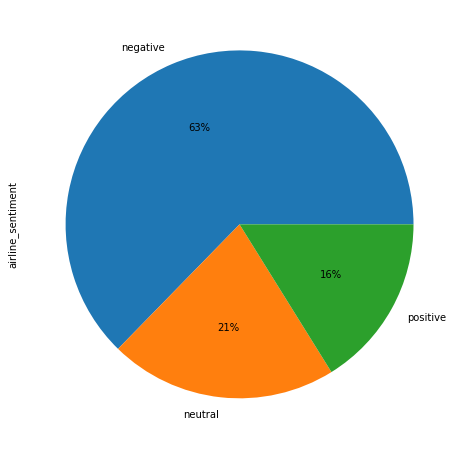

In [23]:
plt.figure(figsize=(10,8))
df.airline_sentiment.value_counts().plot(kind='pie' ,  autopct='%1.0f%%' )

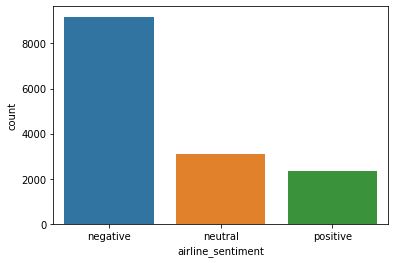

In [33]:
ax = sns.countplot(data=df, x="airline_sentiment", order=df.airline_sentiment.value_counts().index )
plt.show()

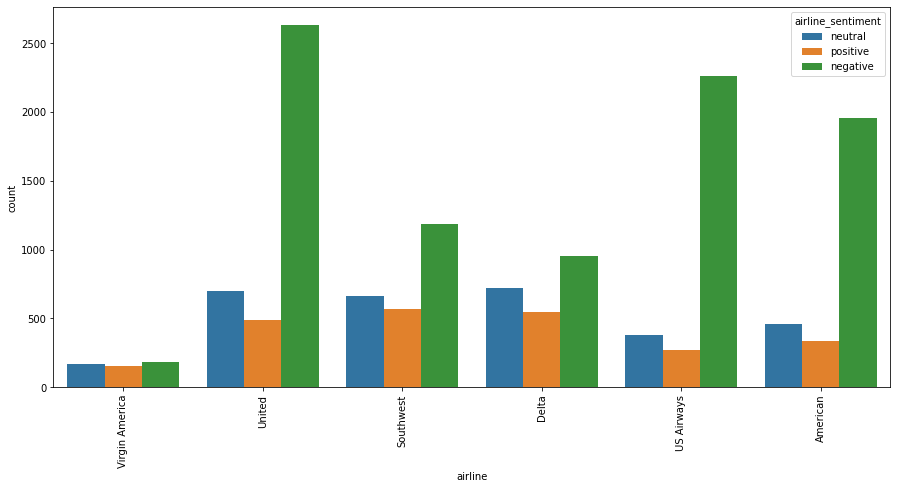

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='airline',hue='airline_sentiment')
plt.xticks(rotation=90)
plt.show()

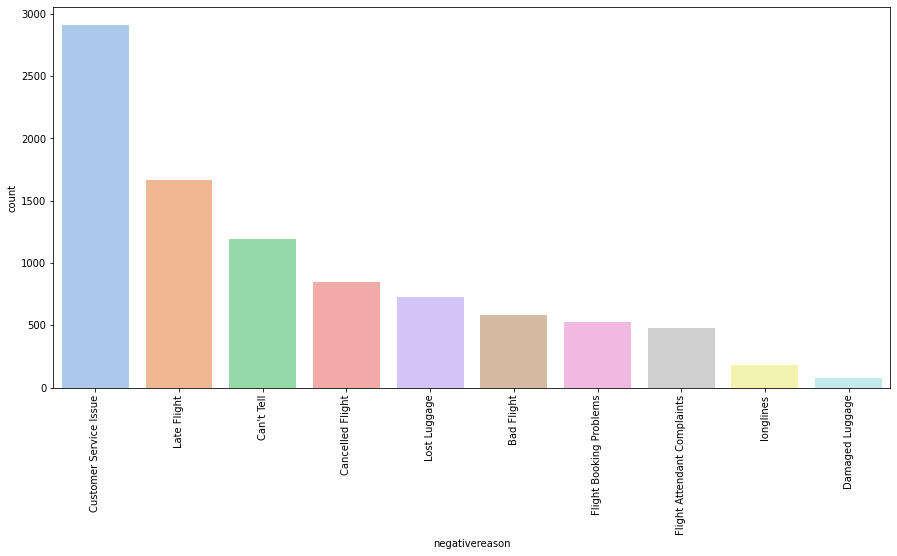

In [91]:
plt.figure(figsize=(15,7))
sns.countplot(data =data, x ="negativereason", order=data.negativereason.value_counts().index, palette = 'pastel')
plt.xticks(rotation =90);
ax.yaxis.grid(True) 

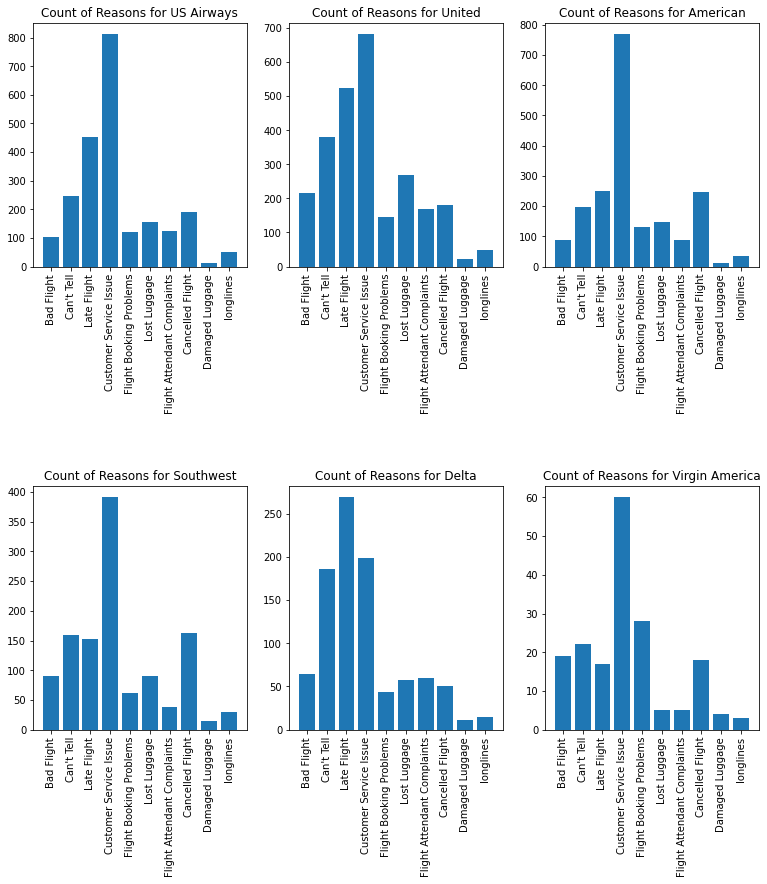

In [88]:
# lets plot negative reasons for each airlines. 

def NCount(Airline):
    airlineName =data[data['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= data['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count,)
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)

airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)


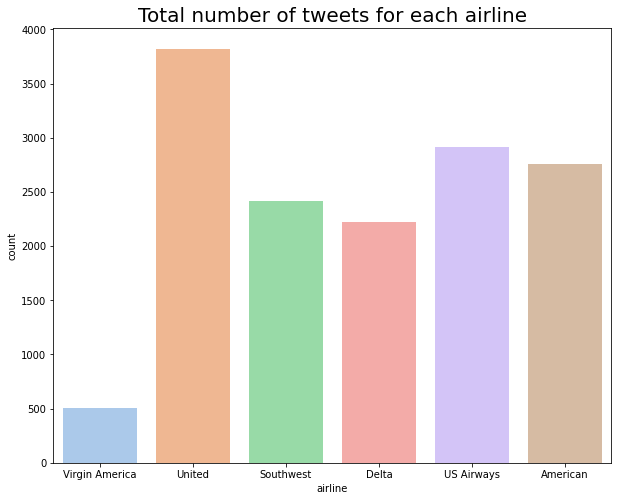

In [89]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()

In [95]:
# split text based on sentiments 
positive = df[df['airline_sentiment'] == 'positive'].text
neutral  = df[df['airline_sentiment'] == 'neutral'].text
negative  = df[df['airline_sentiment'] == 'negative'].text

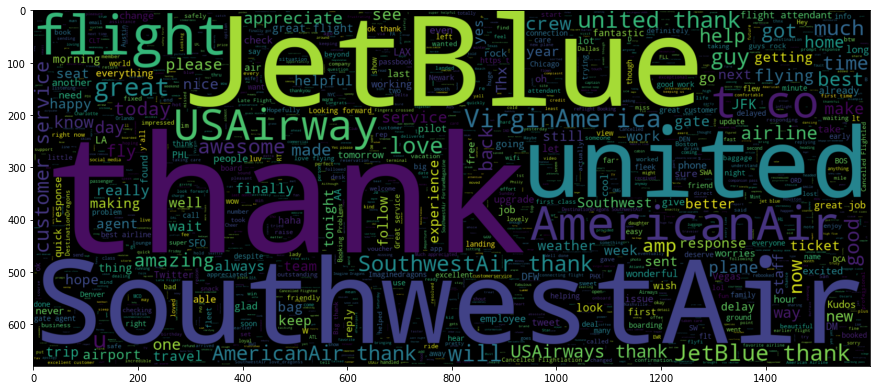

In [97]:
# world could of positive sentiments
plt.figure(figsize = (15,10)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(positive))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
ax.grid(False)

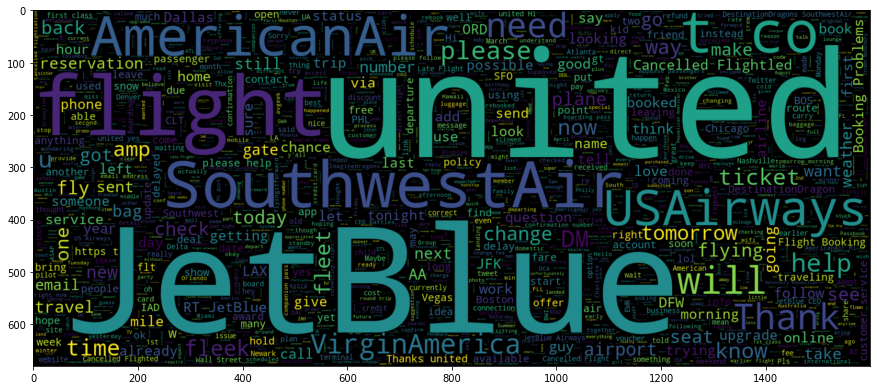

In [98]:
# world could of neutral sentiments
plt.figure(figsize = (15,10)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(neutral))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
ax.grid(False)

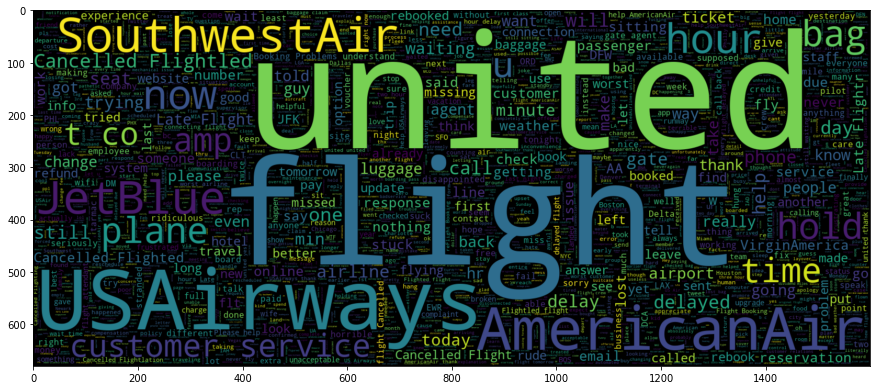

In [99]:
# world could of negative sentiments
plt.figure(figsize = (15,10)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(negative))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
ax.grid(False)

- We can see from the output that 63% of all the tweets have negative sentiments, 21% have a neutral sentiment, while only 16% have positive sentiment. This shows that our dataset is not equally distributed with respect to the output. 
- From the output, we can see that the ratio of negative tweets is higher than neutral and positive tweets for almost all the airlines.
- Reason for negative feedback is mostly due to customer service 
- United has maximum tweets.



# Data Preprocessing and cleaning


In [56]:
# function for data cleansing . 
def clean_text(data):
    
    import re

    #1. Remove HTML
    data = BeautifulSoup(data).get_text() 
  
    #2. Remove non-letters        
    data = re.sub("[^a-zA-Z]", " ", data) 

    #3. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #4. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #5. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #6. Removing upper brackets
    data = data.replace("'", "")
    
    #7. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #8. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #9. Removing Stopwords
    stop_words = stopwords.words('english')
    for i in ["not", "no"]:
            stop_words.remove(i)
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #10. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)


In [57]:
# apply data cleansing 

cleaned_txt = df["text"].apply(clean_text)
cleaned_txt.head()

0                          virginamerica dhepburn said
1    virginamerica plus added commercial experience...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: text, dtype: object

# Build Model

### Tfidf vectorizer

In [58]:
X = df['text']
y = df['airline_sentiment']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y )

In [63]:
Tfid_vectorizer = TfidfVectorizer(preprocessor=clean_text,  min_df=3 )

In [64]:
X_train_tfidf = Tfid_vectorizer.fit_transform(X_train)
X_test_tfidf = Tfid_vectorizer.transform(X_test)

In [74]:
X_train_tfidf_array = X_train_tfidf.toarray()

### Count Vectorizer 

In [65]:
count_vectorizer = CountVectorizer(max_features=1000) 

In [66]:
# train data features 
train_data_features = count_vectorizer.fit_transform(cleaned_txt)

In [67]:
train_data_features = train_data_features.toarray()

In [68]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Random Forest Model with Count Vectorization

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
# Initialize a Random Forest classifier with 10 trees
forest = RandomForestClassifier(n_estimators = 20,n_jobs=4) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
print ("Training the random forest...")
forest = forest.fit( train_data_features, df['airline_sentiment'] )
# random forest performance through cross vaidation 
print (forest)
print (np.mean(cross_val_score(forest,train_data_features,df['airline_sentiment'],cv=20)))

Training the random forest...
RandomForestClassifier(n_estimators=20, n_jobs=4)
0.7255464480874317


### Random Forest Model with Tfidf Vectorization

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
# Initialize a Random Forest classifier with 30 trees
forest = RandomForestClassifier(n_estimators = 30,n_jobs=4) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
print ("Training the random forest...")
forest = forest.fit( X_train_tfidf_array, y_train )
# random forest performance through cross vaidation 
print (forest)
print (np.mean(cross_val_score(forest,X_train_tfidf_array,y_train,cv=10)))

Training the random forest...
RandomForestClassifier(n_estimators=30, n_jobs=4)
0.7551244815696745


### Random Forest with SMOTE and Tdidf vectorization

Data is imbalanced so there is score to improve the model performace. 
Lets use SMOTE to reduct imbalance in training set. 

In [145]:
X = df['text']
y = df['airline_sentiment']

In [146]:
# apply clean text and use tfid vectorizer
Tfid_vectorizer = TfidfVectorizer(preprocessor=clean_text,  min_df=3 )

In [147]:
X_tfidf = Tfid_vectorizer.fit_transform(X)

In [148]:
feature_names=Tfid_vectorizer.get_feature_names()

In [149]:
# handle imbalance
smote = SMOTE()
x_tfidf_sm,y_tfidf_sm = smote.fit_resample(X_tfidf,y)

In [150]:
# split train and test
X_train_sm , X_test_sm , y_train_sm , y_test_sm = train_test_split(x_tfidf_sm , y_tfidf_sm , test_size=0.2)

In [151]:
# Initialize a Random Forest classifier with 30 trees
forest_sm = RandomForestClassifier(n_estimators = 10,n_jobs=4) 
forest_sm = forest_sm.fit( X_train_sm.toarray(), y_train_sm )
# random forest performance through cross vaidation 
print (forest_sm)
print (np.mean(cross_val_score(forest_sm, X_train_sm.toarray(), y_train_sm,cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.8518184887835638


In [152]:
forest_sm_prediction =  forest_sm.predict(X_test_sm.toarray())

In [153]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
accuracy_score(forest_sm_prediction,y_test_sm)

0.8665335028145996

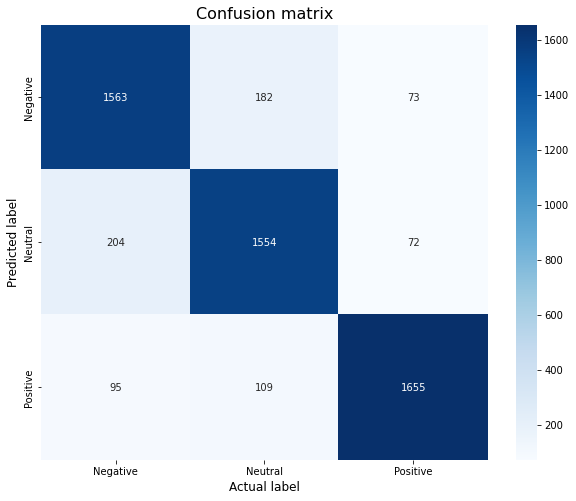

In [154]:
cm = confusion_matrix(y_test_sm,forest_sm_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,8))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

#### Important features/Words

In [155]:
 
importances = forest_sm.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

sorted_indices.size

3873

In [156]:
len(feature_names)

3873

In [157]:
# Top features/words
for i in sorted_indices[:10]:
  print( feature_names[i])

thanks
thank
jetblue
great
united
hour
not
southwestair
usairways
no


### Random Forest with SMOTE and Count vectorization

In [160]:
X = df['text']
y = df['airline_sentiment']

In [158]:
count_vectorizer = CountVectorizer(preprocessor=clean_text,max_features=1000) 

In [161]:
# train data features 
X_countvectorzer = count_vectorizer.fit_transform(X)

In [172]:
cv_feature_names=count_vectorizer.get_feature_names()

In [162]:
# Handle imblance. 
smote = SMOTE()
x_cv_sm,y_cv_sm = smote.fit_resample(X_countvectorzer,y)


In [163]:
# split train and test
X_train_cvsm , X_test_cvsm , y_train_cvsm , y_test_cvsm = train_test_split(x_cv_sm , y_cv_sm , test_size=0.2)

In [165]:
# RF model :

# Initialize a Random Forest classifier with 30 trees
forest_cvsm = RandomForestClassifier(n_estimators = 10,n_jobs=4) 
forest_cvsm = forest_sm.fit( X_train_cvsm.toarray(), y_train_cvsm )
# random forest performance through cross vaidation 
print (forest_cvsm)
print (np.mean(cross_val_score(forest_cvsm, X_train_cvsm.toarray(), y_train_cvsm,cv=10)))


RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7449945846284255


In [166]:
forest_cvsm_prediction =  forest_cvsm.predict(X_test_cvsm.toarray())

In [169]:
accuracy_score(forest_cvsm_prediction,y_test_cvsm)

0.7432358816052297

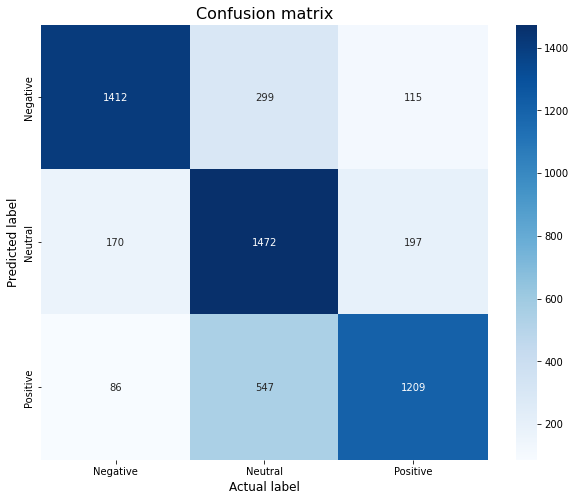

In [170]:
cm = confusion_matrix(y_test_cvsm,forest_cvsm_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,8))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

#### important features

In [174]:
importances = forest_cvsm.feature_importances_
#
# Sort the feature importance in descending order
#
cv_sorted_indices = np.argsort(importances)[::-1]

cv_sorted_indices.size

1000

In [175]:
len(cv_feature_names)

1000

In [176]:
# Top features/words
for i in cv_sorted_indices[:10]:
  print( cv_feature_names[i])

thanks
thank
not
flight
hour
no
great
customer
hold
get


Summary: 
- TDidf vectorization based model is performing better compared to count vectorization
- Data is imbalanced so using SMOTE increased performance significantly. 
- Key feature from RF are words which appeared most are inline with that we observed in EDA wordcloud. 